In [1]:
# Load modules we'll need.
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

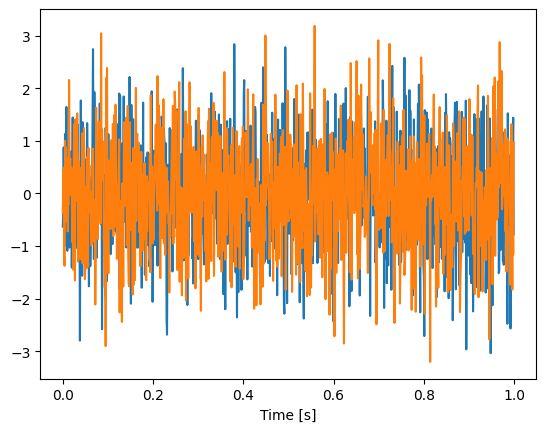

In [2]:
# Make two noise signals, with multiple trials.

N = 1000;
K = 100;
dt= 0.001;
T = N*dt;
x = np.random.randn(K,N)
y = np.random.randn(K,N)
t = np.arange(0,N)*dt

plt.plot(t,x[0,:])
plt.plot(t,y[0,:])
plt.xlabel('Time [s]');

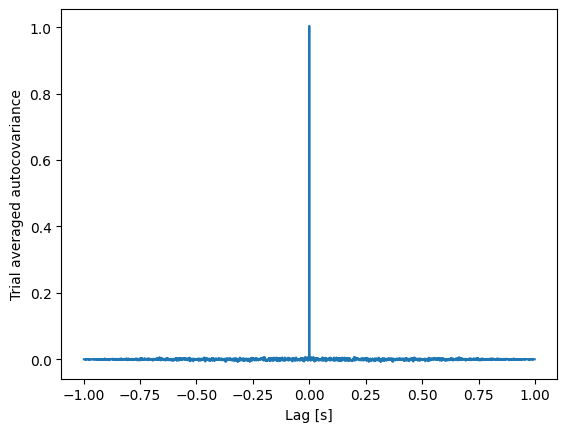

In [3]:
# Compute the auto-covariance for each trial, then average over trials. 
ac_xx = 1/N*np.array([np.correlate(x0,x0, 'full') for x0 in x]);  # Compute ac for each trial, #make an array of full cross-correlation for each row in x against itself then multiply it by 1/length of trial(N) then store in ac_xx
ac_xx = np.mean(ac_xx,0)                                          # ... average over trials,
lags  = np.arange(-N + 1, N)                                      # ... create a lag axis,
plt.plot(lags * dt, ac_xx)                                        # ... and plot the result.
plt.xlabel('Lag [s]')
plt.ylabel('Trial averaged autocovariance');


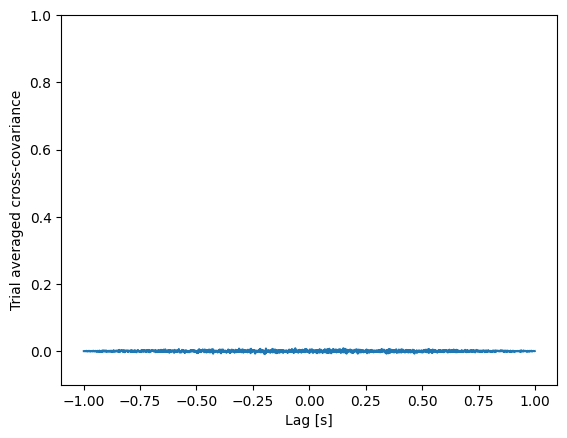

In [4]:
# Compute the cross-covariance.
cc_xy = 1/N*np.array([np.correlate(x[k,:],y[k,:], 'full') for k in range(0,K)]); # Compute cc for each trial, 
cc_xy = np.mean(cc_xy,0)                     # ... average over trials,
lags = np.arange(-N + 1, N)                  # ... create a lag axis,
plt.plot(lags * dt, cc_xy)                   # ... and plot the result.
plt.xlabel('Lag [s]')
plt.ylabel('Trial averaged cross-covariance');
plt.ylim([-0.1, 1]);


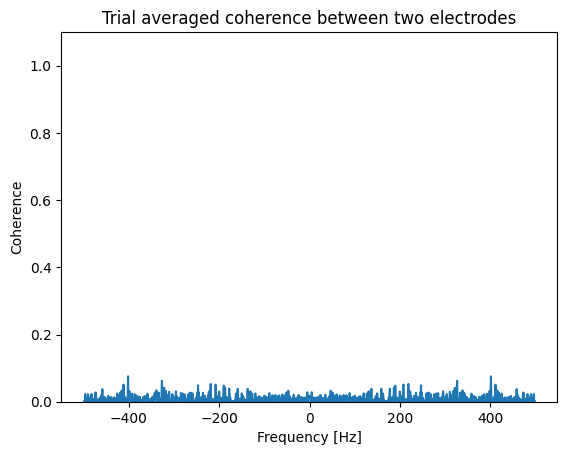

In [7]:
# Compute the coherence.

# Fourier transforms.
Xf = np.array([np.fft.fft(x0 - x0.mean()) for x0 in x])  # Compute Fourier transform of x for each trial
Yf = np.array([np.fft.fft(y0 - y0.mean()) for y0 in y])  # Compute Fourier transform of y for each trial

# Auto- and cross-spectra.
Sxx = 2*dt**2/T * Xf * np.conj (Xf)  # Spectrum of E1 trials
Syy = 2*dt**2/T * Yf * np.conj (Yf)  # ... and E2 trials
Sxy = 2*dt**2/T * Xf * np.conj (Yf)   # ... and the cross spectrum

# Trial average.
Sxx = np.mean(Sxx,0) #0 designates all rows
Syy = np.mean(Syy,0)
Sxy = np.mean(Sxy,0)

# Calculate coherence.
cohr_squared = ((np.abs(Sxy) **2)) / ((np.abs(Sxx) * np.abs(Syy))) #ask vivianna cause i missed it lmfao

f = np.fft.fftfreq(N, dt)                      # Define a frequency axis.
plt.plot(f, cohr_squared.real)               # Plot the coherence.
plt.ylim([0, 1.1])                      # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')            # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Trial averaged coherence between two electrodes');